# Fraudulent Transaction Prediction using Machine Learning

**Steps involved:**

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Model training** - create model(s) to learn to predict a target variable based on other variables.
* **Model evaluation** - evaluating a models predictions using problem-specific evaluation metrics.
* **Model comparison** - comparing several different models to find the best one.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - since we're predicting the presence of fraudulent transactions, are there some things which are more important for prediction?
* **Cross-validation** - if we do build a good model, can we be sure it will work on unseen data?
* **Reporting what we've found** - if we had to present our work, what would we show someone?


## 1. Problem Definition
In our case, the problem we will be exploring is **binary classification** (a sample can only be one of two things).

This is because we're going to be using a number of differnet features (pieces of information) about a transaction to predict whether it is fraudluent or not.

In a statement,

*`Given transactional parameters about a transaction, can we predict whether or not it is fraudulent?`*

## 2. Data
Data for the
case is available in CSV format having `6362620` rows and `10` columns.


## 3. Data Dictionary

* **step** - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* **type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* **amount** - amount of the transaction in local currency.

* **nameOrig** - customer who started the transaction

* **oldbalanceOrg** - initial balance before the transaction

* **newbalanceOrig** - new balance after the transaction

* **nameDest** - customer who is the recipient of the transaction

* **oldbalanceDest** - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

* **newbalanceDest** - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

* **isFraud** - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

* **isFlaggedFraud** - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### Libraries Required

* **pandas** for data analysis.
* **NumPy** for numerical operations.
* **Matplotlib/seaborn** for plotting or data visualization.
* **Scikit-Learn** for machine learning modelling and evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.ensemble import RandomForestClassifier

## Model Evaluators
from sklearn.model_selection import train_test_split

## Data Exploration (exploratory data analysis or EDA)

The goal is to become a subject matter expert on the dataset we're working with. So when we start building models, we can sound check them to make sure they're not performing too well (overfitting) or why they might be performing poorly (underfitting).

Since EDA has no real set methodolgy, the following is a short check list we might want to walk through:

1. What question(s) are we trying to solve (or prove wrong)?
2. What kind of data do we have and how do we treat different types?
3. What’s missing from the data and how do we deal with it?
4. Where are the outliers and why should we care about them?
5. How can we add, change or remove features to get more out of our data?

In [2]:
df = pd.read_csv("Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# Description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [5]:
# Checking for missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
# Data Types of the features/attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


We select `isFraud` as our target attribute.



In [6]:
fraudPercentage = df.isFraud.value_counts(normalize=True)
print("Percentage of Non-Fraudulent and Fraudulent Transactions:\n{}".format(fraudPercentage*100))

Percentage of Non-Fraudulent and Fraudulent Transactions:
0    99.870918
1     0.129082
Name: isFraud, dtype: float64


Frome the above data we can infer that less than `0.13` percent of the total transactions are fraudulent.

### Relationship between the Type of Transaction with our Target Attribute (isFraud)

**Types of Transaction :**
* PAYMENT
* TRANSFER
* CASH_OUT
* DEBIT
* CASH_IN

In [7]:
print(df.type.unique())

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [8]:
print("Percentage of each individual type of transactions:")
print((df.type.value_counts()/df.type.value_counts().sum())*100)

Percentage of each individual type of transactions:
CASH_OUT    35.166331
PAYMENT     33.814608
CASH_IN     21.992261
TRANSFER     8.375622
DEBIT        0.651178
Name: type, dtype: float64


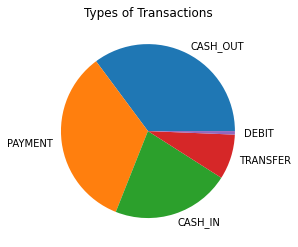

In [9]:
((df.type.value_counts()/df.type.value_counts().sum())*100).plot(kind="pie")

plt.title("Types of Transactions");\
plt.ylabel("");

In [10]:
pd.crosstab(df.isFraud, df.type)

type,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
isFraud,,,,,
0,1399284,2233384,41432,2151495,528812
1,0,4116,0,0,4097


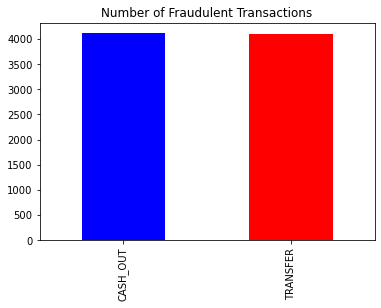

In [11]:
df.type[df.isFraud == 1].value_counts().plot(kind="bar", color=["blue","red"])

plt.title("Number of Fraudulent Transactions");

From the above crosstab we can infer that fraudulent transactions take place only in `CASH_OUT` and `TRASNFER` type of transactions where `4116 of CASH_OUT` and `4097 of TRANSFER` transactions where fraudulent. 

### Relationship between the Amount and our Target Attribute (isFraud)

In [12]:
#Amount Details for all the Transactions
print("Maximum Transaction amount:", df.amount.max())
print("Minimum Transaction amount:", df.amount.min())
print("Average Transaction amount:", round(df.amount.mean(),2))

print("\nMaximum Amount Transaction occurend for transaction:", df.type[df.amount == df.amount.max()])

#Amount Details for CASH_OUT and TRANSFER Transactions
print("\nMaximum CASH_OUT Transaction amount:", df.amount[df.type=="CASH_OUT"].max())
print("Minimum CASH_OUT Transaction amount:", df.amount[df.type=="CASH_OUT"].min())
print("Average CASH_OUT Transaction amount:", round(df.amount[df.type=="CASH_OUT"].mean(),2))

print("\nMaximum TRANSFER Transaction amount:", df.amount[df.type=="TRANSFER"].max())
print("Minimum TRANSFER Transaction amount:", df.amount[df.type=="TRANSFER"].min())
print("Average TRANSFER Transaction amount:", round(df.amount[df.type=="TRANSFER"].mean(),2))

Maximum Transaction amount: 92445516.64
Minimum Transaction amount: 0.0
Average Transaction amount: 179861.9

Maximum Amount Transaction occurend for transaction: 3686583    TRANSFER
Name: type, dtype: object

Maximum CASH_OUT Transaction amount: 10000000.0
Minimum CASH_OUT Transaction amount: 0.0
Average CASH_OUT Transaction amount: 176273.96

Maximum TRANSFER Transaction amount: 92445516.64
Minimum TRANSFER Transaction amount: 2.6
Average TRANSFER Transaction amount: 910647.01


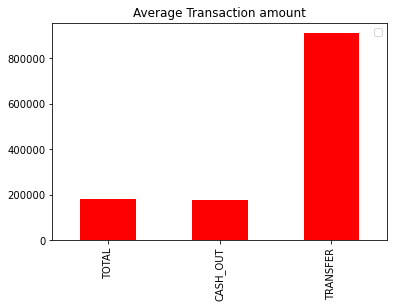

In [13]:
avg = {"TOTAL":round(df.amount.mean(),2),
       "CASH_OUT": round(df.amount[df.type=="CASH_OUT"].mean(),2),
       "TRANSFER": round(df.amount[df.type=="TRANSFER"].mean(),2)
    }

pd.DataFrame(avg.values(), index=avg.keys()).plot(kind="bar", color="red")

plt.title("Average Transaction amount")
plt.legend("");

In [14]:
flagged = df[df.isFlaggedFraud==1]
flagged.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1


In [15]:
print("The Number of Transactions that are flagged to be fraud are:", len(flagged))

The Number of Transactions that are flagged to be fraud are: 16


In [16]:
flagged.isFraud

2736446    1
3247297    1
3760288    1
5563713    1
5996407    1
5996409    1
6168499    1
6205439    1
6266413    1
6281482    1
6281484    1
6296014    1
6351225    1
6362460    1
6362462    1
6362584    1
Name: isFraud, dtype: int64

From the above data we can infer that all the Flagged Transactions were correctly identified as Fraud.

In [17]:
flagged.amount.min(), flagged.amount.max()

(353874.22, 10000000.0)

In [18]:
fraud = df[df.isFraud == 1]
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [19]:
print(f"There are a total of {len(fraud)} Fraudulent Transactions in the dataset.")

There are a total of 8213 Fraudulent Transactions in the dataset.


In [20]:
print(f"A total of {round((len(flagged)/len(fraud)) * 100,2)} % of Fraudulent Transactions were Flagged.")

A total of 0.19 % of Fraudulent Transactions were Flagged.


### Relationship between the Source/Destination and our Target Attribute (isFraud)

In [21]:
# Customers whose entire balance was transacted (ie. newbalanceOrig = 0)
# and what is their relationship with the Fraudulent Transactions

print(str(len(df[df.newbalanceOrig == 0])) + " Transactions had the entire balance of the sender emptied. ie newbalanceOrig = 0")

3609566 Transactions had the entire balance of the sender emptied. ie newbalanceOrig = 0


In [22]:
# Customers whose balance were empty before transaction (ie. oldbalanceDest = 0)
# and what is their relationship with the Fraudulent Transactions

print(str(len(df[df.oldbalanceDest == 0])) + " Customers had zero balance before Transaction. ie oldbalanceDest = 0")

2704388 Customers had zero balance before Transaction. ie oldbalanceDest = 0


In [23]:
df.isFraud[df.newbalanceOrig==0].value_counts()

0    3601513
1       8053
Name: isFraud, dtype: int64

In [24]:
df.isFraud[df.oldbalanceDest==0].value_counts()

0    2699037
1       5351
Name: isFraud, dtype: int64

In [25]:
len(fraud)

8213

### ALERT !!!!!

From the above observations we can see that of the total `8213` Fraudulent Transactions that took place, In `8053 (98.05%)` of those Transactions the entire balance of the customer was emptied.

Additionaly, In `5351 (68.15%)` Fraudulent Transactions the recepient had zero balance before the Transaction.

In [26]:
len(fraud), df.isFraud[df.newbalanceOrig==0].sum()

(8213, 8053)

In [27]:
len(fraud), df.isFraud[df.oldbalanceDest==0].sum()

(8213, 5351)

In [28]:
print(f"In {round(df.isFraud[df.newbalanceOrig==0].sum()/len(fraud) * 100,2)} % of Fraudulent Transaction the entire balance of the sender(origin) was emptied")

In 98.05 % of Fraudulent Transaction the entire balance of the sender(origin) was emptied


In [29]:
print(f"In {round(df.isFraud[df.oldbalanceDest==0].sum()/len(fraud) * 100,2)} % of Fraudulent Transaction the balance of the recepient was empty before the transaction.")

In 65.15 % of Fraudulent Transaction the balance of the recepient was empty before the transaction.


In [30]:
pd.DataFrame({df.isFraud[df.newbalanceOrig==0].sum(),len(fraud)}, index=["Total Fraud", "Zero New Bal Orig"]).T

,Total Fraud,Zero New Bal Orig
0,8213,8053


In [31]:
pd.DataFrame({df.isFraud[df.oldbalanceDest==0].sum(),len(fraud)}, index=["Total Fraud", "Zero old Bal Dest"]).T

,Total Fraud,Zero old Bal Dest
0,8213,5351


### Correlation between independent variables
Finally, we'll compare all of the independent variables in one hit.

This may give an idea of which independent variables may or may not have an impact on our target variable.

We can do this using `df.corr()` which will create a **correlation matrix** for us, in other words, a big table of numbers telling us how related each variable is the other.

In [338]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


<AxesSubplot:>

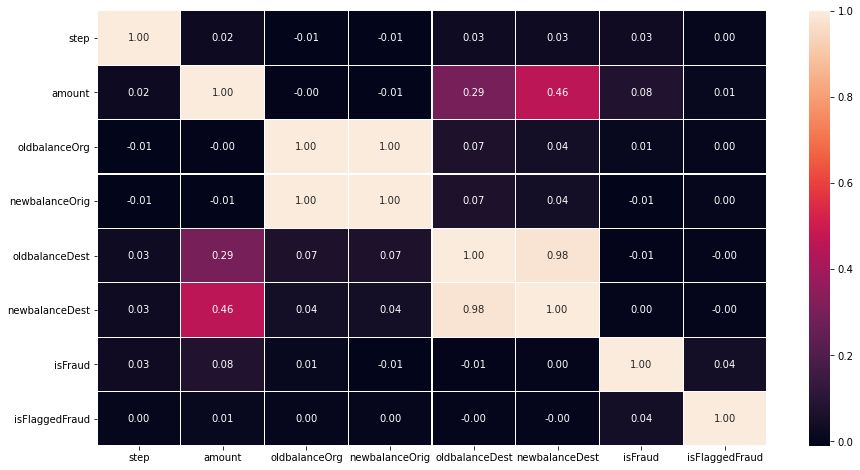

In [339]:
corr_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.15,
            fmt=".2f")

## Modeling
We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

` ` Given transactional parameters about a transaction, can we predict whether or not it is fraudulent?

That's what we'll be trying to answer.

Our evaluation metric?

` ` If we can reach 95% accuracy at predicting whether or not a transaction is fraudulent during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

In [4]:
# Everything except target variable
X = df.drop("isFraud", axis=1)

# Target variable
y = df.isFraud.values

In [5]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [6]:
y[:5]

array([0, 0, 1, 1, 0], dtype=int64)

### Transforming to Numerical Data

In [7]:
nameOrigin = []
for i in range(0, len(df)):
    nameOrigin.append(int(df.nameOrig[i].split("C")[1]))
    

In [8]:
len(nameOrigin), len(df)

(6362620, 6362620)

In [10]:
X.nameOrig = nameOrigin
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,C553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,C38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [9]:
nameDestination = []
for i in range(0, len(df)):
    if (df.nameDest[i][0] == 'M'):
        nameDestination.append(int(df.nameDest[i].split("M")[1]))
    else:
        nameDestination.append(int(df.nameDest[i].split("C")[1]))
    
len(nameDestination)

6362620

In [11]:
X.nameDest = nameDestination
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,CASH_OUT,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,PAYMENT,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


In [12]:
## Label Encoding transaction type
X["type"] = X["type"].astype('category')
X["type"] = X["type"].cat.codes
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,3,9839.64,1231006815,170136.0,160296.36,1979787155,0.0,0.0,0
1,1,3,1864.28,1666544295,21249.0,19384.72,2044282225,0.0,0.0,0
2,1,4,181.00,1305486145,181.0,0.00,553264065,0.0,0.0,0
3,1,1,181.00,840083671,181.0,0.00,38997010,21182.0,0.0,0
4,1,3,11668.14,2048537720,41554.0,29885.86,1230701703,0.0,0.0,0


### Training, Validation and Test Split
Now comes one of the most important concepts in machine learning, the training/test split.

This is where we'll split our data into a training set, validation set and a test set.



In [13]:
np.random.seed(42) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [14]:
len(X_train),len(X_val),len(X_test)

(4072076, 1018020, 1272524)

## Model choices
Now we've got our data prepared, we can start to fit models. We'll be using the following model.

* RandomForest           -     `RandomForestClassifier()`

In [15]:
#put all the models in a dictionary
models = {
          "RandomForestClassifier": RandomForestClassifier(verbose=2)
        }

#create a function to fit and score model
def fit_and_score(models, X_train, X_test, X_val, y_train, y_test, y_val):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_val :   validation data
    X_test : training data
    y_train : labels assosciated with training data
    y_val : labels assosciated with validation data
    y_test : labels assosciated with test data
    """
    np.random.seed(80)
    model_scores = {}
    for name, model in models.items():
        model_scores["model"] = name
        model.fit(X_train, y_train)
        model_scores["validation score"] = model.score(X_test, y_test)
        model_scores["test score"] = model.score(X_test, y_test)
    return model_scores
        
model_scores = fit_and_score(models, X_train, X_test, X_val, y_train, y_test, y_val)

print("Model Scores:\n")
for name, score in model_scores.items():
    print("{}\t:\t{}".format(name,score))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.3s remaining:    0.0s


building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 51.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   27.2s finished


Model Scores:

model	:	RandomForestClassifier
validation score	:	0.9997013808776888
test score	:	0.9997013808776888


#### Prediction on Test Datatset

Our Model achieved an Accuracy of `99.97%` on the Test Dataset.

## QnA

#### **1. How did you select variables to be included in the model?**
After Analysis of data at the Exploratory Data Analysis step each feature was decided to have diiferent priorites at the predicition of our `target feature (isFraud)`. Features like `Sender Balance after transaction (newbalanceOrig)` and `Recepient Balance before transaction` had high correlation with our target feature (isFraud) which can also be infered from the correlation matrix.
The `type of transaction` is also considered an important feature as we can observe in the EDA steps that Fraudulent Transactions took place when the type of transaction was either `CASH_OUT` or `TRANSFER`.
Also for our model the `Customer identity (nameOrig)` and `Recipent identity (nameDest)` was also deemed to be of importance as to find patterns among particular Customers and Fraudulent identities.


#### **2. Demonstrate the performance of the model by using best set of tools.**
We have selected `randomForestClassifier` as our model of choice for the Project and `Accuracy Score` as the metric for the evaluation of the performance of our model. Our model achieved and Accuracy Score of `99.97%` on our Test Dataset. Hence, We can conclude it to be a feasible selection for our problem.


#### **3. What are the key factors that predict fraudulent customer?**
The Three key factors that predict fradulent customer according to the EDA step are the `type of transaction`, `sender balance after the transaction` and `recepient balance before the transaction`. 


#### **4. Do these factors make sense? If yes, How? If not, How not?**
Yes, The above factors make sense as we can safely assume that fraudulent activites are only likey to occur while `withdrawal` or `transfer` of funds. Also during a fraudulent transaction an assilant is likey to use a dummy account to transfer funds into, which is more likey to have no prior balance, hence our observation that in `5351 (68.15%)` Fraudulent Transactions the recepient had zero balance before the Transaction. It is also likey that the entire amount of a victim is to be transferred or cashed out during a fraudulent transaction, hence our observation that in `8053 (98.05%)` of transactions the entire balance of the customer was emptied ie.Customer had zero balance after the transaction.


#### **5. What kind of prevention should be adopted while company update its infrastructure?**
The company should implement a `review period for transactions` whenever the entire balance of a customer is been transacted during which the transaction `should be verified` by a employee at the company or an intelligent bot via a call or other instant communication channels with the customer before processing a transaction. If the customer does not verify the transaction the transaction should be cancelled and details about the transaction should be transferred to the concerned department at the company for review to possibly trace the assilant.

#### **6. Assuming these actions have been implemented, how would you determine if they work?**
The above mentioned prevention has a decent possibility to be effective at reducing the fraudulent transactions that take place. The effectivness of the method can be gauged by conducting a time series analysis of the entire transaction history and comparing the percentage of fraudulent transactions that take place at periodic intervals.